Ramadhian Eka Putra
/ 2301872242

## Harris Corner Detection

Import seluruh libraries yang akan digunakan

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from scipy import ndimage as ndi

Membuat fungsi Harris Corner Detector

In [ ]:
def harris_corner(input_img, k, window_size, threshold):

    #mengubah gambar menjadi grayscale
    output_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

    #menentukan offset dan x dan y range untuk dipakai pada perhitungan nanti
    offset = int(window_size/2)
    y_range = output_img.shape[0] - offset
    x_range = output_img.shape[1] - offset

    #mengkalkulasi derivative gambar pada tiap pixel
    dx = cv2.Sobel(output_img, cv2.CV_64F, 1, 0)
    dy = cv2.Sobel(output_img, cv2.CV_64F, 0, 1)

    #Setup struktur tensor
    Ixx = ndi.gaussian_filter(dx**2, sigma=1)
    Ixy = ndi.gaussian_filter(dy*dx, sigma=1)
    Iyy = ndi.gaussian_filter(dy**2, sigma=1)

    #Kalkulasi Harris Response
    for y in range(offset, y_range):
        for x in range(offset, x_range):

            start_y = y - offset
            end_y = y + offset + 1
            start_x = x - offset
            end_x = x + offset + 1

            windowIxx = Ixx[start_y : end_y, start_x : end_x]
            windowIxy = Ixy[start_y : end_y, start_x : end_x]
            windowIyy = Iyy[start_y : end_y, start_x : end_x]

            Sxx = windowIxx.sum()
            Sxy = windowIxy.sum()
            Syy = windowIyy.sum()

            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy

            r = det - k*(trace**2)

            #Mencari edges menggunakan r dan menerapkan threshold
            if r > threshold:
                cv2.circle(output_img,(x,y),1,(0,255,0), thickness=0)

    return output_img

Menginputkan seluruh variable yang dibutuhkan fungsi harris_corner

In [ ]:
img1 = cv2.imread('SpeakerOri.png')
img2 = cv2.imread('Speaker3.jpg')
k = 0.05
window_size = 3
threshold = 50000

In [ ]:
result1 = harris_corner(img1, k, window_size, threshold)
result2 = harris_corner(img2, k, window_size, threshold)

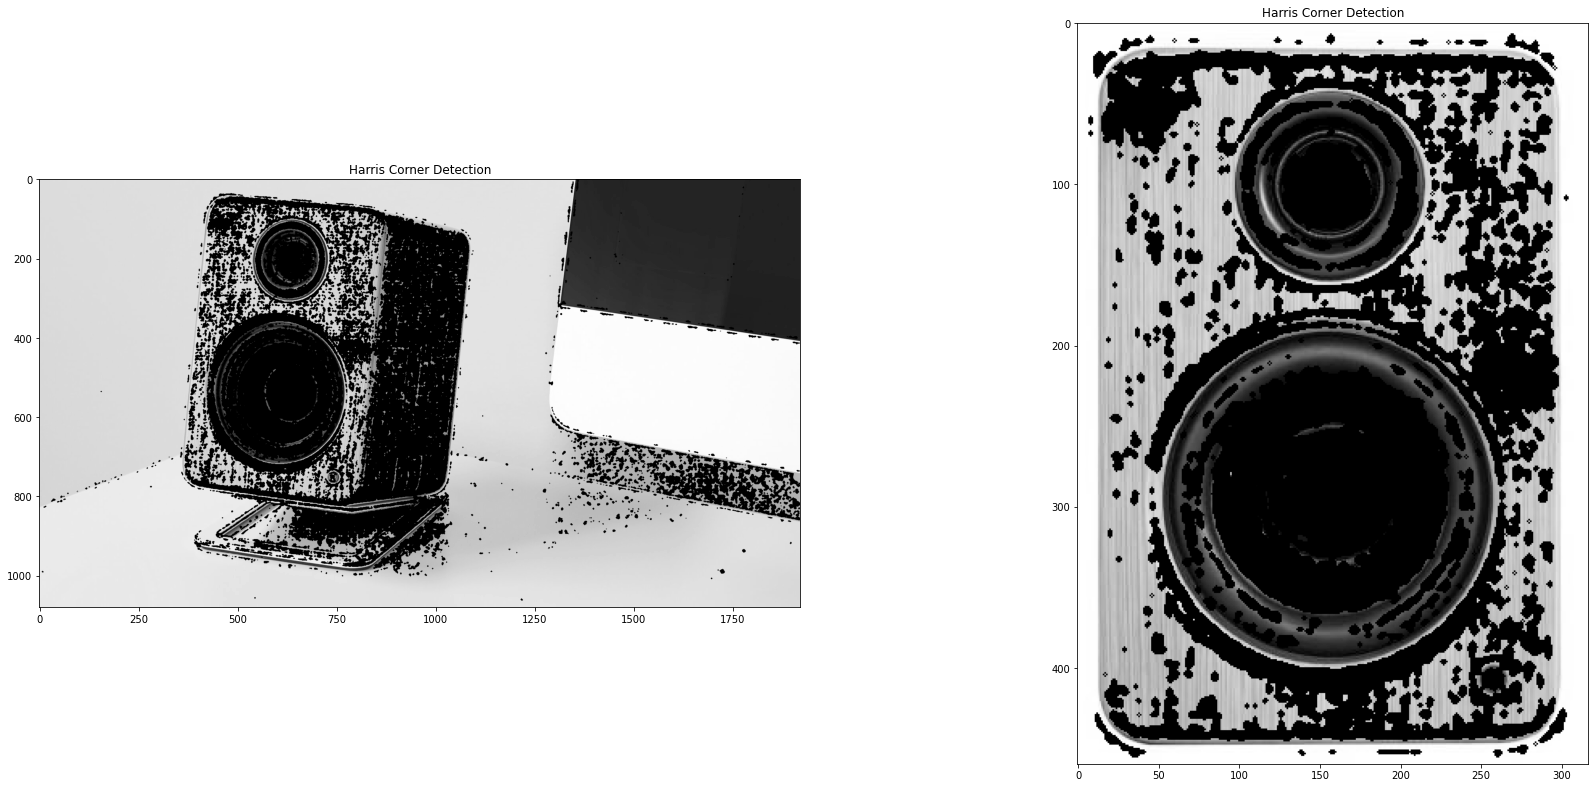

In [ ]:
plt.figure(figsize=(30,30))

plt.subplot(2,2,2)
plt.title("Harris Corner Detection")
plt.imshow(result1, cmap = 'gray')

plt.subplot(2,2,1)
plt.title("Harris Corner Detection")
plt.imshow(result2, cmap = 'gray')

## Image Matching using cv2.BFMatcher

Membaca kedua file gambar yang akan digunakan

In [ ]:
img_start = cv2.imread('SpeakerOri.png')
img_scene = cv2.imread('Speaker3.jpg')

Mengubah kedua gambar menjadi grayscale

In [ ]:
img1 = cv2.cvtColor(img_start, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img_scene, cv2.COLOR_BGR2GRAY)

Menginisiasikan ORB Descriptor untuk mendapatkan features

In [ ]:
orb = cv2.ORB_create()

Mencari keypoint dan feature descriptor menggunakan ORB

In [ ]:
key1, desc1 = orb.detectAndCompute(img1,None)
key2, desc2 = orb.detectAndCompute(img2,None)

Selanjutnya, membuat membuat objek BFMatcher dengan satuan Hamming Distance, kemudian melakukan descriptor matching

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(desc1,desc2)

Mengsortir matches sesuai dengan jaraknya

In [ ]:
matches = sorted(matches, key = lambda x:x.distance)

Menggambar seluruh keypoint yang match pada kedua image

In [ ]:
matched_img = cv2.drawMatches(img1, key1, img2, key2, matches, None, flags=2)

Plotting untuk melihat hasil

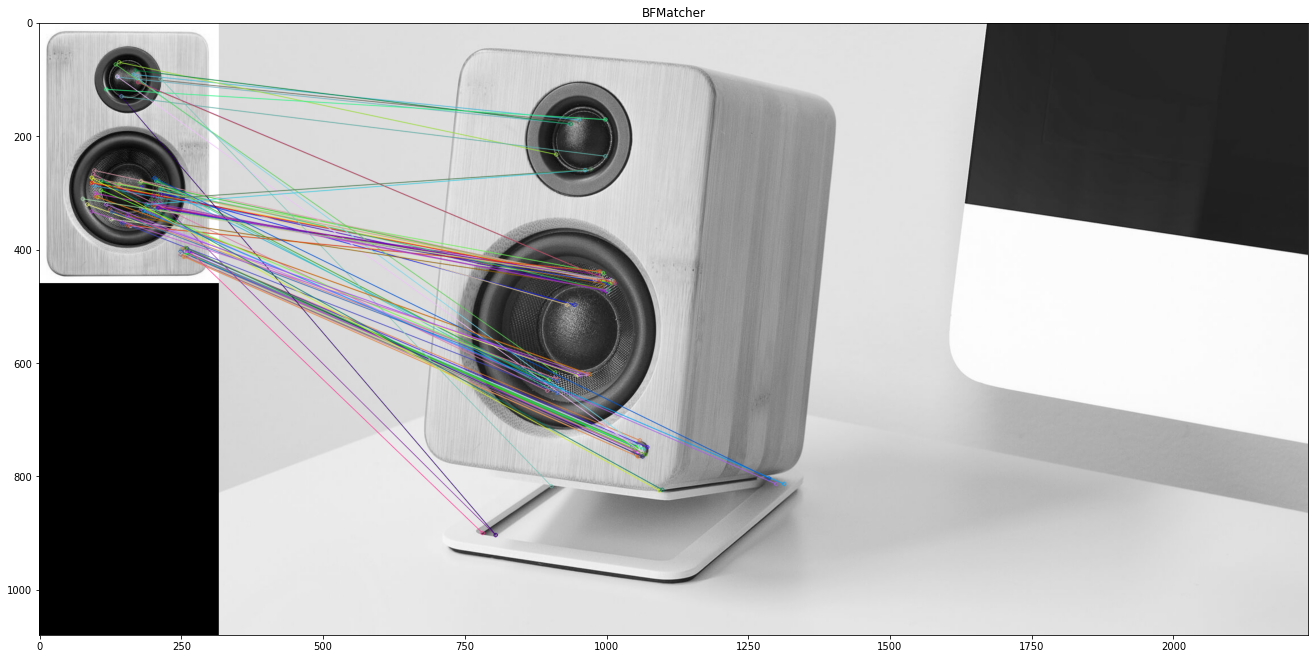

In [ ]:
plt.figure(figsize=(50,30))

plt.subplot(2,2,2)
plt.title("BFMatcher")
plt.imshow(matched_img, cmap = 'gray')

## Image Matching using cv2.FLANN

Membaca kedua gambar yang akan digunakan

In [ ]:
img_start = cv2.imread('SpeakerOri.png')
img_scene = cv2.imread('Speaker3.jpg')

Mengubah kedua gambar menjadi grayscale

In [ ]:
img1 = cv2.cvtColor(img_start, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img_scene, cv2.COLOR_BGR2GRAY)

Kali ini, saya akan gunakan SIFT untuk mendapatkan features pada image

In [ ]:
sift = cv2.SIFT_create()

Mencari keypoint dan feature descriptor menggunakan SIFT

In [ ]:
kp1, dsc1 = sift.detectAndCompute(img1, None)
kp2, dsc2 = sift.detectAndCompute(img2, None)

Menginisiasikan FLANN parameters

In [ ]:
FLAN_INDEX_KDTREE = 1
index_params = dict (algorithm = FLAN_INDEX_KDTREE, trees=5)
search_params = dict (checks=50)

Membuat objek FLANN matcher

In [ ]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

Kemudian menggunakan k-nearest neighbor untuk mengkalkulasi matches.

In [ ]:
matches = flann.knnMatch (dsc1, dsc2,k=2)

Membuat ratio test untuk mendapatkan match terbaik

In [ ]:
good_matches = []

for match1, match2 in matches:
  if match1.distance < 1 * match2.distance:
    good_matches.append([match1])

Menampilkan good matches yang sudah didapatkan

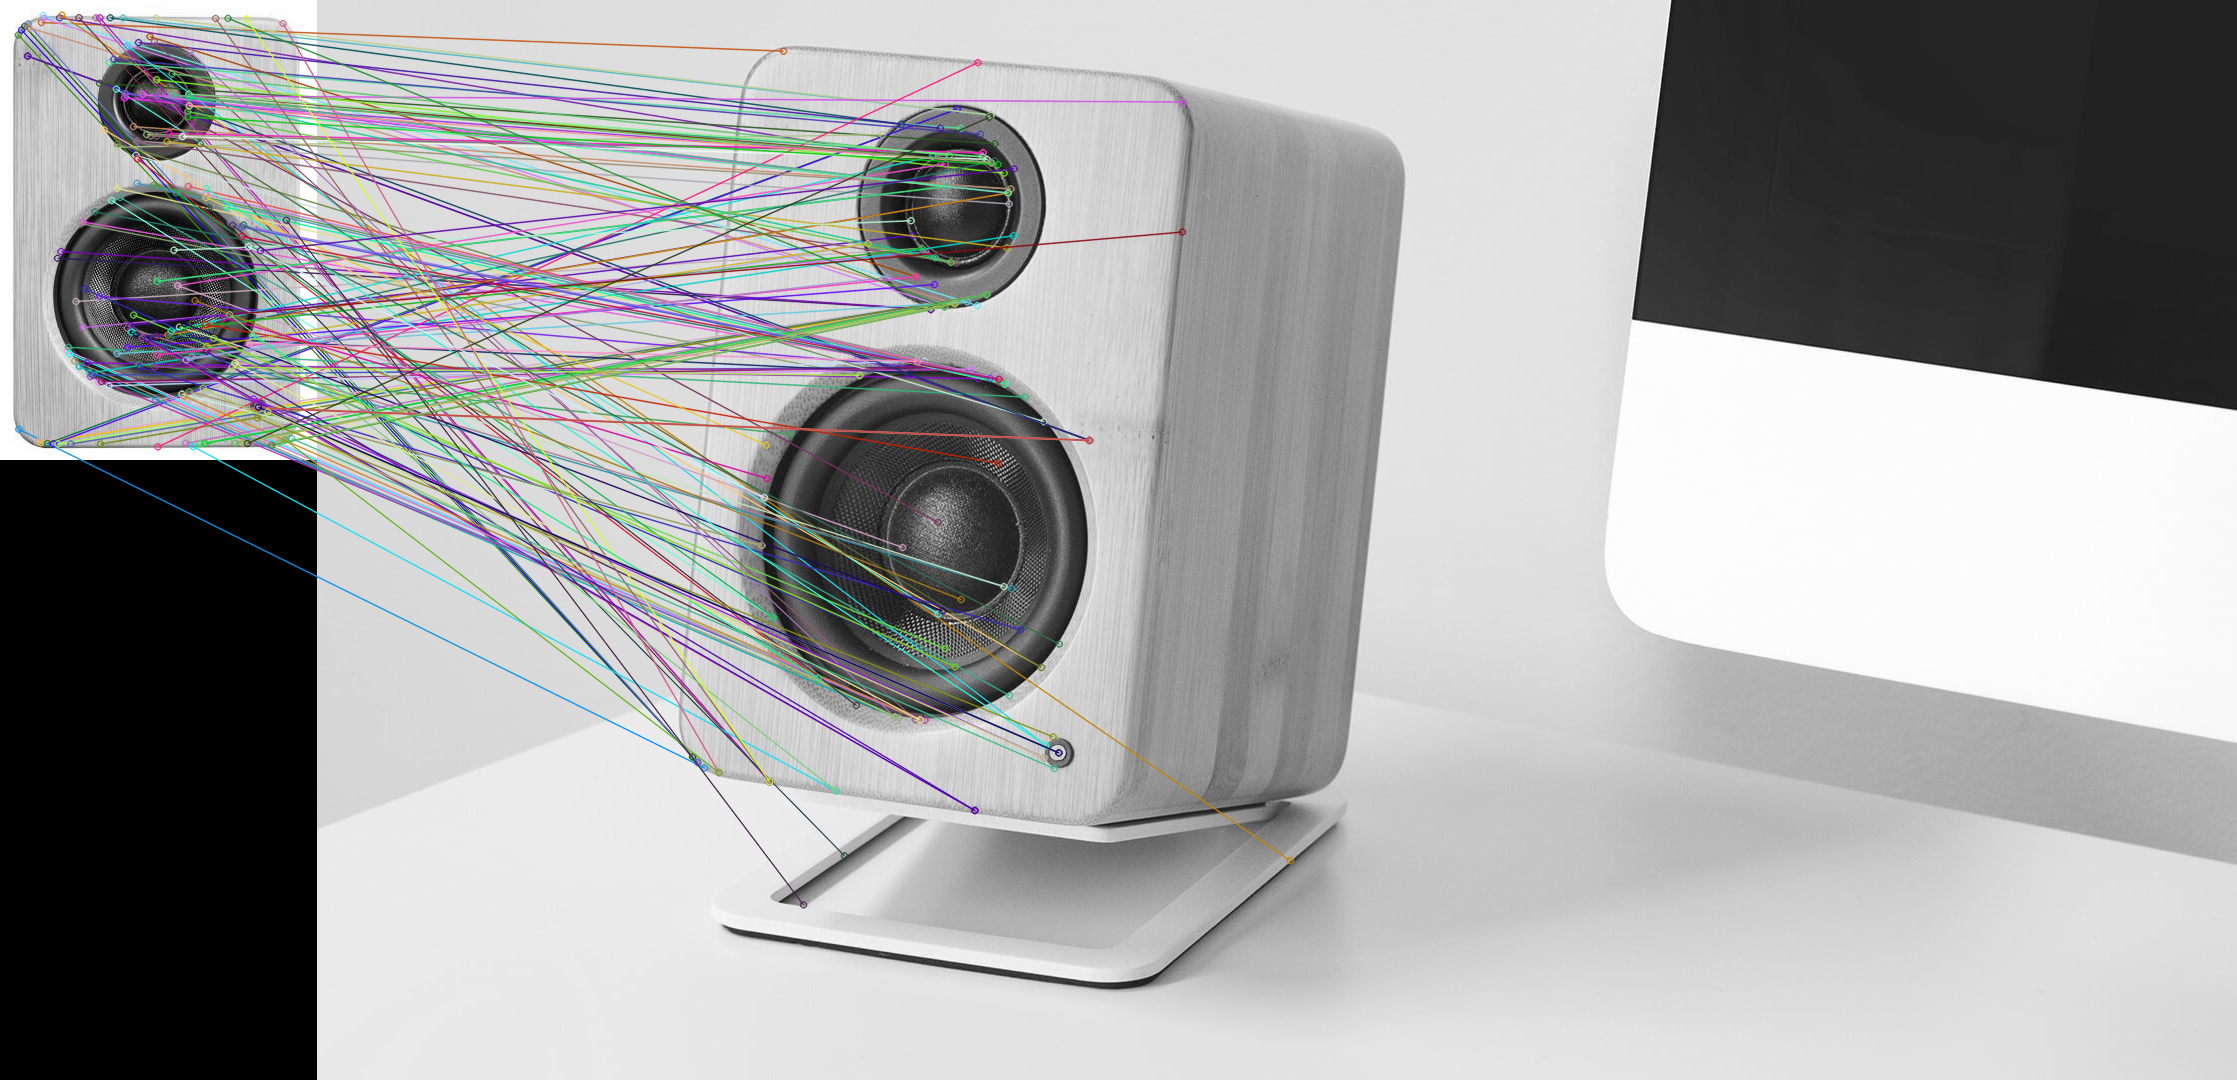

In [ ]:
flann_matches =cv2.drawMatchesKnn(img1, kp1, img2, kp2, good_matches, None, flags=2)
cv2_imshow(flann_matches)